In [25]:
import os, glob, joblib
import numpy as np
import pandas as pd
from sklearn.svm import SVR, SVC
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [26]:
class JuPyter_ML:
    def save_model(model, path):
        with open(path, "wb") as mdl:
            return joblib.dump(model, mdl)
    
    def load_model(path):
        with open(path, "rb") as mdl:
            return joblib.load(mdl)
        
    def plot_data(dataY, dataX):
        plt.plot(dataX, dataY)
        plt.scatter(dataX, dataY, edgecolors='none', s=30, label='Data')
        plt.title('Data Visualization')
        plt.xlabel('Data X')
        plt.ylabel('Data Y')
        plt.legend()
        plt.show()
        
    def Model_RMSE(actual, predic):
        rmse = np.sqrt(((actual - predic)**2).mean())
        return rmse
    
    def Model_R2(actual, predic):
        rsqrt = (1 - sum((actual - predic)**2) / sum((actual - actual.mean(axis=0))**2))
        return rsqrt
    
    def RFR_Model(dataX, dataY, tsize, rstate):
        X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=tsize, random_state=rstate)
        ###
        best_score = 0
        for n_estimate in [150, 200, 250, 300, 350, 400, 450, 500]:
            clfRFR = RandomForestRegressor(n_estimators=n_estimate, random_state=rstate)
            clfRFR.fit(X_train, y_train)
            score = clfRFR.score(X_test, y_test)
            if score > best_score:
                best_score = score
                best_esti = n_estimate
        clfRFR_Model = RandomForestRegressor(n_estimators=best_esti, random_state=rstate)
        clfRFR_Model.fit(X_train, y_train)
        return(clfRFR_Model)
    
    def SVR_Model(dataX, dataY, tsize, rstate, ker):
        X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=tsize, random_state=rstate)
        ###
        best_score = 0
        for C in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
            for gamma in [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 1]:
                for epsilon in [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5]:
                    clfSVR = SVR(kernel=ker, C=C, gamma=gamma, epsilon=epsilon)
                    clfSVR.fit(X_train, y_train)
                    score = clfSVR.score(X_test, y_test)
                    if score > best_score:
                        best_score = score
                        best_C = C
                        best_gam = gamma
                        best_eps = epsilon
        clfSVR_Model = SVR(kernel=ker, C=best_C, gamma=best_gam, epsilon=best_eps)
        clfSVR_Model.fit(X_train, y_train)
        return(clfSVR_Model)

In [27]:
dir_location = "Data/Data Excel"
read_data = pd.read_excel(dir_location + "/Line_6_7_Join_69.16.xlsx")
read_data.head(4)

,frci5m,Band_2,Band_3,Band_4,Band_5,B_NDVI,cluster
0,0.000,0.099,0.085,0.066,0.305,0.644205,1
1,0.000,0.097,0.094,0.063,0.351,0.695652,1
2,0.000,0.118,0.116,0.112,0.044,-0.435897,1
3,0.004,0.097,0.091,0.057,0.432,0.766871,1


In [36]:
select_col = ['Band_2', 'Band_3', 'Band_4', 'Band_5']
select_row = 'frci5m'
dfx = pd.DataFrame(read_data, columns=select_col)
dfy = np.asarray(read_data[select_row])

clf_model = JuPyter_ML.SVR_Model(dfx, dfy, tsize=0.2, rstate=5, ker='rbf')
clf_pred = clf_model.predict(dfx)
rmse_model = JuPyter_ML.Model_RMSE(dfy, clf_pred)
r2_model = JuPyter_ML.Model_R2(dfy, clf_pred)
print(clf_model)
print('RMSE:', rmse_model, '...', 'R2:', r2_model)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
RMSE: 0.18340502382729928 ... R2: 0.6232280958463752


## Explanation
SVR parm: Kernel=rbf, C=10, epsilon=0.01, gamma=1
Try one using NDVI in Line_6_7 data we get the RMSE: 0.178663 and R2: 0.642456
Try two without NDVI RMSE: 0.183405 and R2: 0.623228

SVR parm: Kernel=linear, C=10, epsilon=0.01, gamma=0.01
Try one using NDVI in Line_6_7 data we get the RMSE: 0.18868 and R2: 0.60122
Try two without NDVI RMSE: 0.189296 and R2: 0.5986331


[1.059053400622893, -0.14655698633285086]


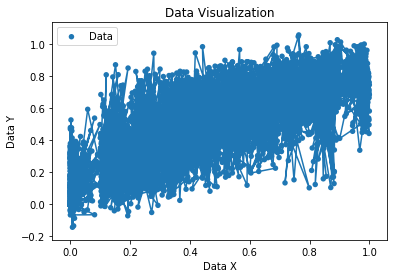

In [34]:
print([clf_pred.max(), clf_pred.min()])
JuPyter_ML.plot_data(clf_pred, dfy)

In [37]:
save_location = 'Data/Data Model'
JuPyter_ML.save_model(clf_model, (save_location + '/L6n7_SVRnoNDVI_rbf.pkl'))